# De Bruijn Sequences with NetworkX

De Bruijn sequences are an interesting concept to study, with many real life applications.

One interesting application is related to PIN code cracking. For a code to be cracked (in this example), only the last 4 digits must be correct, which means that all the digits typed before will be ignored. In other words: given a stream of digits, a code is cracked when the last 4 digits of the stream match the code.

If we want to crack such a 4-digit PIN code, one possible way would be to enumerate all the different combinations and try them one by one. In that case, there would be 10000 combinations to try (from 0000 to 9999), and for each combination, 4 digits must be typed. This results in a total of 40000 digits to type in order to bruteforce the code with this naive approach.

As we might guess, there must be a clever way to produce a list of digits, such that if entered sequentially, would cover all the possible codes in the minimal amount of digits.

And the answer is yes, there exists such a way, thanks to **De Bruijn sequences**. De Bruijn sequences are used in many different domains ranging from computer science to neuroscience. More in-depth information can be found on external websites:
1. De Bruijn Sequences on [Wikipedia](https://en.wikipedia.org/wiki/De_Bruijn_sequence)
2. De Bruijn Sequences on [Datagenetics](http://www.datagenetics.com/blog/october22013/index.html)

The article on Datagenetics provides a (the only?) 10003 digits long solution to the code cracking problem. It also explains the basic idea of these sequences and how to get to that solution.

Alright, let's get started and copy the solution below to use it as a reference. 

## Reference

In [1]:
REF = '''
00001000200030004000500060007000800090011001200130014001500160017001800190021002200230024002500260027002800290031003200330034003500
36003700380039004100420043004400450046004700480049005100520053005400550056005700580059006100620063006400650066006700680069007100720
07300740075007600770078007900810082008300840085008600870088008900910092009300940095009600970098009901010201030104010501060107010801
09011101120113011401150116011701180119012101220123012401250126012701280129013101320133013401350136013701380139014101420143014401450
14601470148014901510152015301540155015601570158015901610162016301640165016601670168016901710172017301740175017601770178017901810182
01830184018501860187018801890191019201930194019501960197019801990202030204020502060207020802090211021202130214021502160217021802190
22102220223022402250226022702280229023102320233023402350236023702380239024102420243024402450246024702480249025102520253025402550256
02570258025902610262026302640265026602670268026902710272027302740275027602770278027902810282028302840285028602870288028902910292029
30294029502960297029802990303040305030603070308030903110312031303140315031603170318031903210322032303240325032603270328032903310332
03330334033503360337033803390341034203430344034503460347034803490351035203530354035503560357035803590361036203630364036503660367036
80369037103720373037403750376037703780379038103820383038403850386038703880389039103920393039403950396039703980399040405040604070408
04090411041204130414041504160417041804190421042204230424042504260427042804290431043204330434043504360437043804390441044204430444044
50446044704480449045104520453045404550456045704580459046104620463046404650466046704680469047104720473047404750476047704780479048104
82048304840485048604870488048904910492049304940495049604970498049905050605070508050905110512051305140515051605170518051905210522052
30524052505260527052805290531053205330534053505360537053805390541054205430544054505460547054805490551055205530554055505560557055805
59056105620563056405650566056705680569057105720573057405750576057705780579058105820583058405850586058705880589059105920593059405950
59605970598059906060706080609061106120613061406150616061706180619062106220623062406250626062706280629063106320633063406350636063706
38063906410642064306440645064606470648064906510652065306540655065606570658065906610662066306640665066606670668066906710672067306740
67506760677067806790681068206830684068506860687068806890691069206930694069506960697069806990707080709071107120713071407150716071707
18071907210722072307240725072607270728072907310732073307340735073607370738073907410742074307440745074607470748074907510752075307540
75507560757075807590761076207630764076507660767076807690771077207730774077507760777077807790781078207830784078507860787078807890791
07920793079407950796079707980799080809081108120813081408150816081708180819082108220823082408250826082708280829083108320833083408350
83608370838083908410842084308440845084608470848084908510852085308540855085608570858085908610862086308640865086608670868086908710872
08730874087508760877087808790881088208830884088508860887088808890891089208930894089508960897089808990909110912091309140915091609170
91809190921092209230924092509260927092809290931093209330934093509360937093809390941094209430944094509460947094809490951095209530954
09550956095709580959096109620963096409650966096709680969097109720973097409750976097709780979098109820983098409850986098709880989099
10992099309940995099609970998099911112111311141115111611171118111911221123112411251126112711281129113211331134113511361137113811391
14211431144114511461147114811491152115311541155115611571158115911621163116411651166116711681169117211731174117511761177117811791182
11831184118511861187118811891192119311941195119611971198119912121312141215121612171218121912221223122412251226122712281229123212331
23412351236123712381239124212431244124512461247124812491252125312541255125612571258125912621263126412651266126712681269127212731274
12751276127712781279128212831284128512861287128812891292129312941295129612971298129913131413151316131713181319132213231324132513261
32713281329133213331334133513361337133813391342134313441345134613471348134913521353135413551356135713581359136213631364136513661367
13681369137213731374137513761377137813791382138313841385138613871388138913921393139413951396139713981399141415141614171418141914221
42314241425142614271428142914321433143414351436143714381439144214431444144514461447144814491452145314541455145614571458145914621463
14641465146614671468146914721473147414751476147714781479148214831484148514861487148814891492149314941495149614971498149915151615171
51815191522152315241525152615271528152915321533153415351536153715381539154215431544154515461547154815491552155315541555155615571558
15591562156315641565156615671568156915721573157415751576157715781579158215831584158515861587158815891592159315941595159615971598159
91616171618161916221623162416251626162716281629163216331634163516361637163816391642164316441645164616471648164916521653165416551656
16571658165916621663166416651666166716681669167216731674167516761677167816791682168316841685168616871688168916921693169416951696169
71698169917171817191722172317241725172617271728172917321733173417351736173717381739174217431744174517461747174817491752175317541755
17561757175817591762176317641765176617671768176917721773177417751776177717781779178217831784178517861787178817891792179317941795179
61797179817991818191822182318241825182618271828182918321833183418351836183718381839184218431844184518461847184818491852185318541855
18561857185818591862186318641865186618671868186918721873187418751876187718781879188218831884188518861887188818891892189318941895189
61897189818991919221923192419251926192719281929193219331934193519361937193819391942194319441945194619471948194919521953195419551956
19571958195919621963196419651966196719681969197219731974197519761977197819791982198319841985198619871988198919921993199419951996199
71998199922223222422252226222722282229223322342235223622372238223922432244224522462247224822492253225422552256225722582259226322642
26522662267226822692273227422752276227722782279228322842285228622872288228922932294229522962297229822992323242325232623272328232923
33233423352336233723382339234323442345234623472348234923532354235523562357235823592363236423652366236723682369237323742375237623772
37823792383238423852386238723882389239323942395239623972398239924242524262427242824292433243424352436243724382439244324442445244624
47244824492453245424552456245724582459246324642465246624672468246924732474247524762477247824792483248424852486248724882489249324942
49524962497249824992525262527252825292533253425352536253725382539254325442545254625472548254925532554255525562557255825592563256425
65256625672568256925732574257525762577257825792583258425852586258725882589259325942595259625972598259926262726282629263326342635263
62637263826392643264426452646264726482649265326542655265626572658265926632664266526662667266826692673267426752676267726782679268326
84268526862687268826892693269426952696269726982699272728272927332734273527362737273827392743274427452746274727482749275327542755275
62757275827592763276427652766276727682769277327742775277627772778277927832784278527862787278827892793279427952796279727982799282829
28332834283528362837283828392843284428452846284728482849285328542855285628572858285928632864286528662867286828692873287428752876287
72878287928832884288528862887288828892893289428952896289728982899292933293429352936293729382939294329442945294629472948294929532954
29552956295729582959296329642965296629672968296929732974297529762977297829792983298429852986298729882989299329942995299629972998299
93333433353336333733383339334433453346334733483349335433553356335733583359336433653366336733683369337433753376337733783379338433853
38633873388338933943395339633973398339934343534363437343834393444344534463447344834493454345534563457345834593464346534663467346834
69347434753476347734783479348434853486348734883489349434953496349734983499353536353735383539354435453546354735483549355435553556355
73558355935643565356635673568356935743575357635773578357935843585358635873588358935943595359635973598359936363736383639364436453646
36473648364936543655365636573658365936643665366636673668366936743675367636773678367936843685368636873688368936943695369636973698369
93737383739374437453746374737483749375437553756375737583759376437653766376737683769377437753776377737783779378437853786378737883789
37943795379637973798379938383938443845384638473848384938543855385638573858385938643865386638673868386938743875387638773878387938843
88538863887388838893894389538963897389838993939443945394639473948394939543955395639573958395939643965396639673968396939743975397639
77397839793984398539863987398839893994399539963997399839994444544464447444844494455445644574458445944654466446744684469447544764477
44784479448544864487448844894495449644974498449945454645474548454945554556455745584559456545664567456845694575457645774578457945854
58645874588458945954596459745984599464647464846494655465646574658465946654666466746684669467546764677467846794685468646874688468946
95469646974698469947474847494755475647574758475947654766476747684769477547764777477847794785478647874788478947954796479747984799484
84948554856485748584859486548664867486848694875487648774878487948854886488748884889489548964897489848994949554956495749584959496549
66496749684969497549764977497849794985498649874988498949954996499749984999555565557555855595566556755685569557655775578557955865587
55885589559655975598559956565756585659566656675668566956765677567856795686568756885689569656975698569957575857595766576757685769577
65777577857795786578757885789579657975798579958585958665867586858695876587758785879588658875888588958965897589858995959665967596859
69597659775978597959865987598859895996599759985999666676668666966776678667966876688668966976698669967676867696777677867796787678867
89679767986799686869687768786879688768886889689768986899696977697869796987698869896997699869997777877797788778977987799787879788878
89789878997979887989799879998888988998989999000
'''.replace('\n', '')

One might wonder why look at that problem if it is already largely covered online by many great resources?

Well, I thought it would be interesting to try to find a solution, but with a different approach.

First, let's look at the (trimmed) code provided on the Wikipedia page generating a De Bruijn sequence for the given parameters `k` and `n`.

In [2]:
def de_bruijn(k, n):
    alphabet = list(map(str, range(k)))
    
    a = [0] * k * n
    sequence = []
    
    def db(t, p):
        if t > n:
            if n % p == 0:
                sequence.extend(a[1:p + 1])
        else:
            a[t] = a[t - p]
            db(t + 1, p)
            for j in range(a[t - p] + 1, k):
                a[t] = j
                db(t + 1, t)
    
    db(1, 1)
    return ''.join(alphabet[i] for i in sequence)

Now let's verify this code produces an optimal solution. A solution is valid if it contains all the different codes from 0000 to 9999. And it's optimal if its length is not greater than the reference solution (considered as the best solution).

In [3]:
from itertools import product

In [4]:
def check_solution(k, n, sol):
    '''Check against the solution sol'''
    for p in product(''.join(map(str, range(k))), repeat=n):
        code = ''.join(p)
        if code not in sol:
            return False
    return True

In [5]:
ls = de_bruijn(10, 4)
ls += ls[:3]  # wrap around
print('Good solution?', check_solution(10, 4, ls))

Good solution? True


At least we find the same result, which is comforting.

But let's be honest. This code snippet from Wikipedia is quite opaque. It would be nice to develop a more intuitive feeling of the problem.

## With NetworkX

Representing this problem as a graph problems makes it more intuitive to understand. It is possible to represent the codes as the nodes and the digits (typed one by one) as the edges of a graph:

<img class="center" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/De_bruijn_graph-for_binary_sequence_of_order_4.svg/548px-De_bruijn_graph-for_binary_sequence_of_order_4.svg.png" alt="De Bruijn Graph example" style="background-color: white;" />

De Bruijn sequences have this great property of being generated by finding an **Eulerian cycle** from a De Bruijn graph.

The De Bruijn sequence corresponding to the De Bruijn graph above is: `0000111101100101`.

Why does the Eulerian cycle give a valid sequence? A few observations can be made without entering into too much details and proofs:

- Each node represents a distinct code.
- All the codes must be tried at least once, so each node has to be visited at least once.
- One code can be created from another by entering a new digit (edge between two nodes).

With these points in mind, the problem is reduced to the implementation of the Eulerian cycle algorithm on the De Bruijn graph. This can be done from scratch, but we can also speed-up the process and use the existing `NetworkX` graph library.

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def create_de_bruijn_graph(k, n):
    g = nx.DiGraph()
    for p in product(tuple(map(str, range(k))), repeat=n):
        code = ''.join(p)
        u = str(code).zfill(n)
        tmp = u[1:]
        for i in range(k):
            v = tmp + str(i)
            g.add_edge(u, v, weight=i)
    return g
    
def de_bruijn_nx(k, n):
    g = create_de_bruijn_graph(k, n)
    ls = nx.eulerian_circuit(g)
    res = ''.join(map(str, (g.get_edge_data(*e)['weight'] for e in ls)))
    return res

We can plot the De Bruijn graph corresponding to the image above to visually verify its correctness.

In [8]:
def draw_de_bruijn_graph(g):
    plt.figure(figsize=(20,20), dpi=80)
    nx.draw_networkx(
        g, pos=nx.circular_layout(g),
        node_shape='o', node_size=4000, font_size=20,
        edge_color='#555555', width=3.0
    )
    nx.draw_networkx_edge_labels(
        g, pos=nx.circular_layout(g), 
        edge_labels=nx.get_edge_attributes(g, 'weight'),
        font_size=24, label_pos=0.25, rotate=False
    )
    plt.axis('off')
    plt.show() 

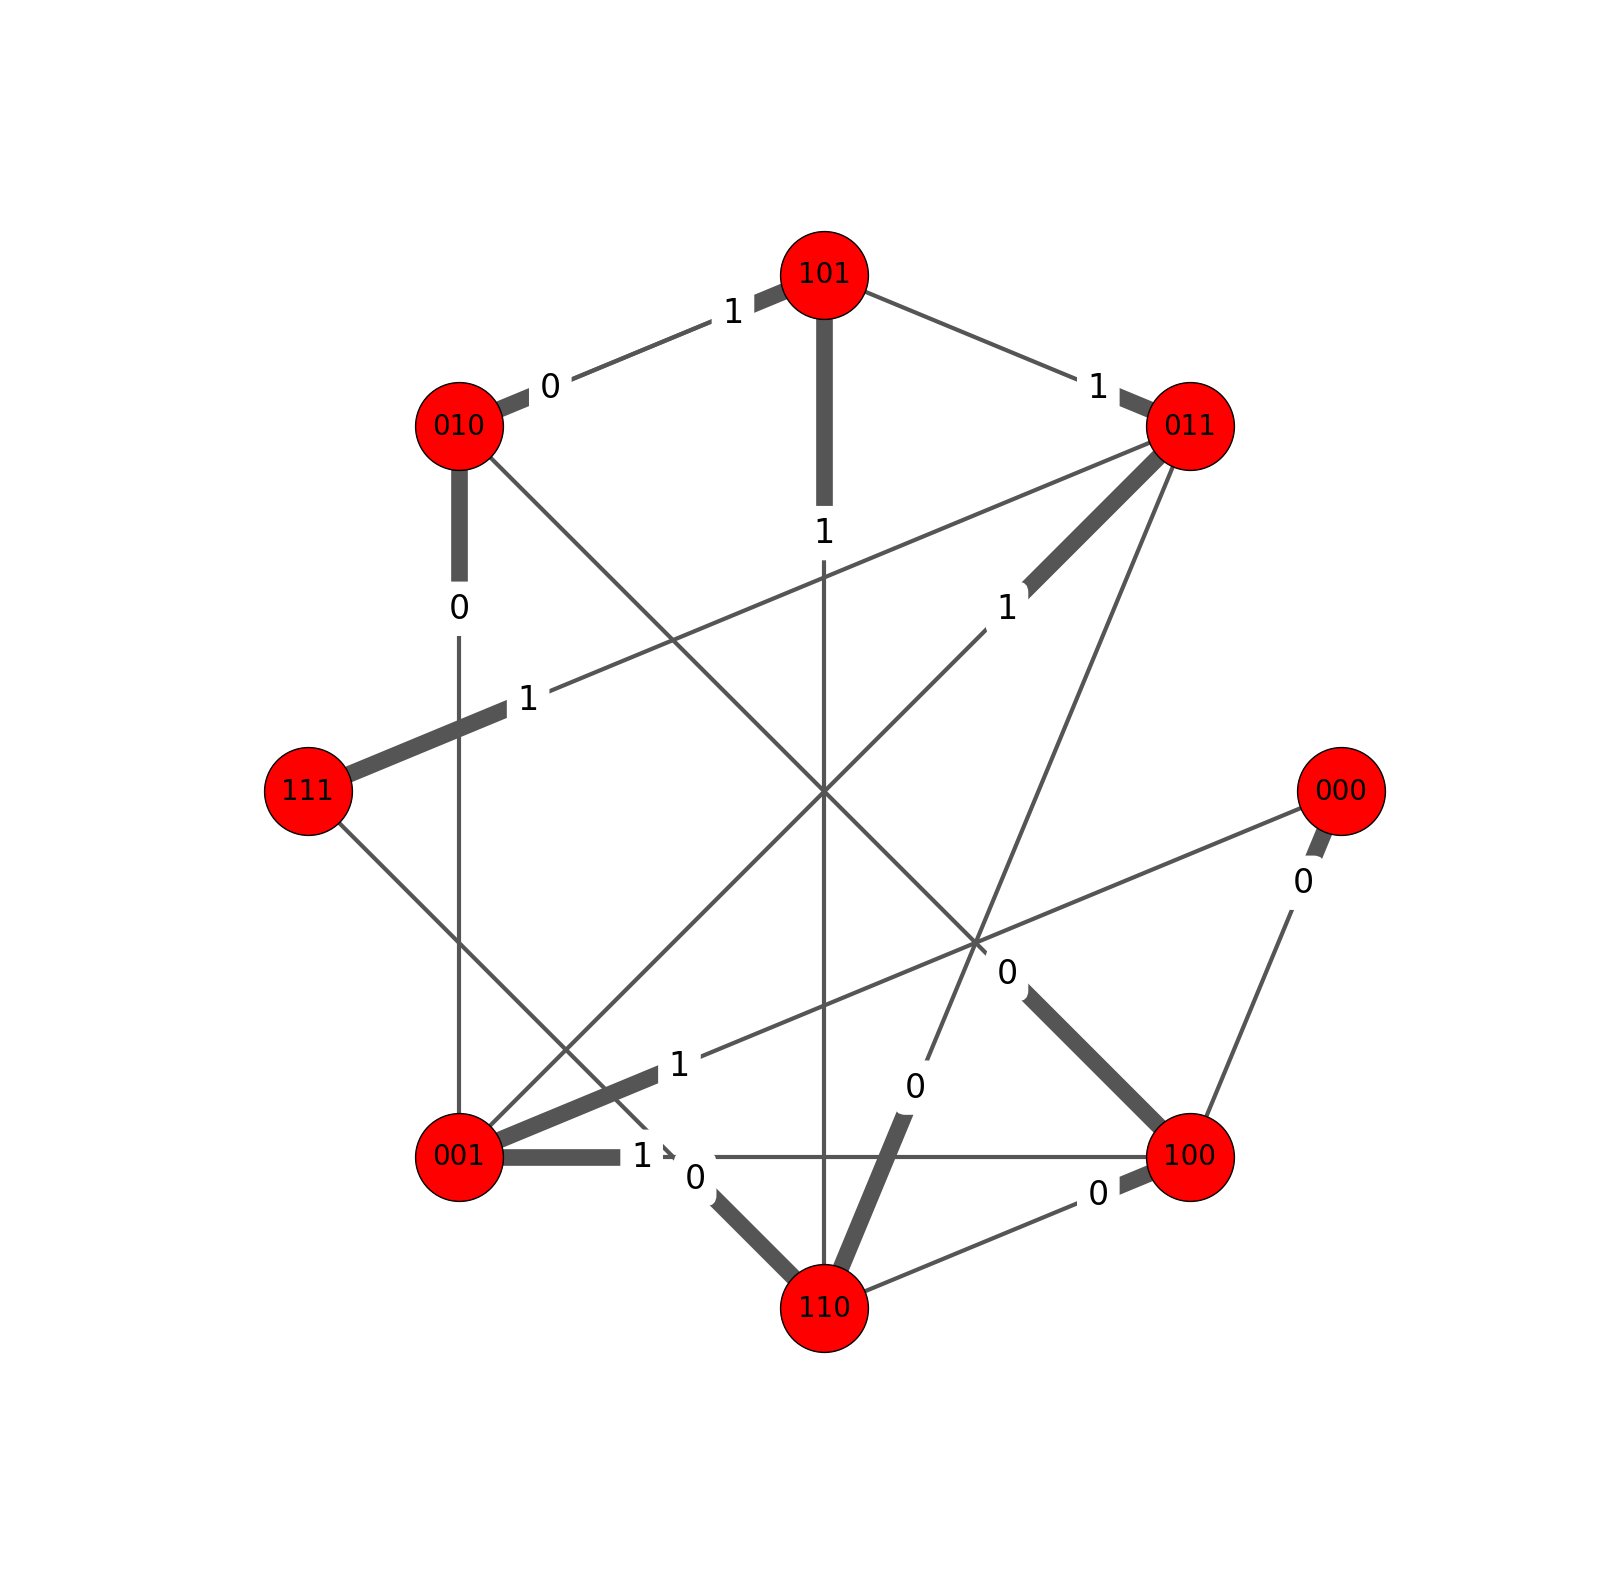

In [9]:
draw_de_bruijn_graph(create_de_bruijn_graph(2, 3))

The `circular_layout` is in that case more suited than the default spring layout. And even though this plot is quite simple (and doesn't show the loop for node `000`), we can still visually verify the graph against the one above.

Now with the real values `k = 10` and `n = 4`:

In [10]:
res = de_bruijn_nx(10, 4)
res += res[:3]  # wrap around
print('Solution (overview): %s...%s' % (res[:50], res[-50:]))
print('Good solution?', check_solution(10, 4, res))

Solution (overview): 22122988380137829916993526127701543952615682852814...68296066402215875256560553296078330089547354732221
Good solution? True


The solution contains all the codes. However it looks different than the reference.

In [11]:
is_circular_permutation = res in (REF + REF)
print('Is circular permutation?', is_circular_permutation)

Is circular permutation? False


That's a practical way to notice that given a De Bruijn graph, the corresponding De Bruijn sequences are not unique.

## Wrap up

There are many more things to learn from De Bruijn sequences. At least now we know that NetworkX is handy for some of the applications!